# Multiple-Choice Questions:Answers

In [1]:
# 1:- B

In [2]:
# 2:- A

In [3]:
#3:- B

In [4]:
#4:- A

In [5]:
#5:- B

In [6]:
#6:- D

In [7]:
#7:- A

In [8]:
#8:- A

In [9]:
#9:- B

In [10]:
# 10:- C

In [11]:
#11:- A

# Case Studies based MCQs

In [12]:
#1:- B,C

In [13]:
#2:- B,C

In [14]:
#3:- A

In [15]:
#4:- C,D

In [16]:
#5:- A

# Case Study: Predicting House Prices using Multiple Polynomial Regression

In [17]:
import pandas as pd
import numpy as np
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [19]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [20]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


###
1.the dataset contains 20,640 samples and 8 features;

2.all features are numerical features encoded as floating number;

3.there is no missing values.

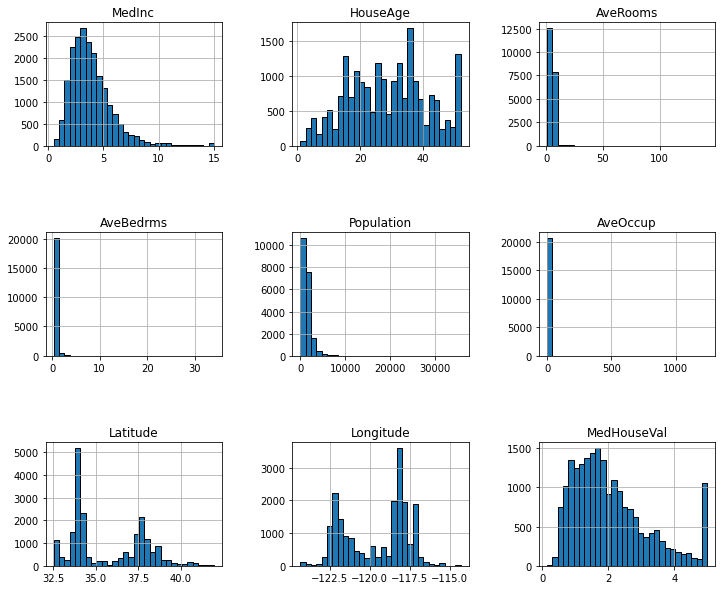

In [22]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [23]:
california_housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Dropping latitude and longitude columns

In [24]:
california_housing.frame = california_housing.frame.drop(['Latitude','Longitude'], axis=1)
california_housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


In [25]:
california_housing.frame.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


In [26]:
california_housing.frame.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'MedHouseVal'],
      dtype='object')

Defining x and y variable

In [27]:
x = california_housing.frame[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']]
y = california_housing.frame['MedHouseVal']

Split the dataset into training and test sets with a 80/20 split.

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=100)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

In [31]:
reg.fit(x_train, y_train)

LinearRegression()

In [32]:
#the value of intercept
reg.intercept_

-0.42932234399256686

In [33]:
#the value of coef
reg.coef_

array([ 5.32827593e-01,  1.61890554e-02, -2.08463037e-01,  9.88784921e-01,
        1.64566265e-05])

In [34]:
pred = reg.predict(x_test)

In [35]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,pred)
print('mean_sqrd_error is==',mean_squared_error(y_test,pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score is ',score)

mean_sqrd_error is== 0.5941876852807141
root_mean_squared error of is== 0.7708357057640195
r2_score is  0.559010764969035


In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
def polymodel(degree):
    poly_feat = PolynomialFeatures(degree=degree)
    x_train_poly = poly_feat.fit_transform(x_train)
    x_test_poly = poly_feat.fit_transform(x_test)
    
    poly_model = LinearRegression()
    poly_model.fit(x_train_poly, y_train)
    
    y_train_pred_poly  =poly_model.predict(x_train_poly)
    y_test_pred_poly  =poly_model.predict(x_test_poly)
    
    rmse_train  = (np.sqrt(mean_squared_error(y_train,y_train_pred_poly)))
    rmse_test = rmse = (np.sqrt(mean_squared_error(y_test,y_test_pred_poly)))
    
    r2_train = r2_score(y_train,y_train_pred_poly)
    r2_test = r2_score(y_test,y_test_pred_poly)
    
    print('rmse_train',rmse_train)
    print('rmse_test',rmse_test)
    
    print('r2_train',r2_train)
    print('r2_test',r2_test)

### polynomial regression for 2 dergree

In [38]:
polymodel(2)

rmse_train 0.7513676353595735
rmse_test 0.7317887525322287
r2_train 0.5747383889953375
r2_test 0.6025561311774152


### polynomial regression for 3 dergree

In [39]:
polymodel(3)

rmse_train 0.7223661023740843
rmse_test 0.7257251990349025
r2_train 0.6069335938100959
r2_test 0.6091152315303103


### MedInc and Population columns as input parameters

In [40]:
X = california_housing.frame[['MedInc', 'Population']]
Y = california_housing.frame['MedHouseVal']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=100)

In [42]:
Reg = LinearRegression()

In [43]:
Reg.fit(X_train, Y_train)

LinearRegression()

In [44]:
#the value of intercept
Reg.intercept_

0.5052153895804643

In [45]:
#the value of coef
Reg.coef_

array([ 4.15875653e-01, -2.92522853e-05])

In [46]:
Pred = Reg.predict(X_test)

In [47]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
# predicting the accuracy score
score=r2_score(Y_test,Pred)
print('mean_sqrd_error is==',mean_squared_error(Y_test,Pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(Y_test,Pred)))
print('r2_score is ',score)

mean_sqrd_error is== 0.6829615448792815
root_mean_squared error of is== 0.8264148745510825
r2_score is  0.49312532606663917


In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
def polymodel(degree):
    poly_feat = PolynomialFeatures(degree=degree)
    X_train_poly = poly_feat.fit_transform(X_train)
    X_test_poly = poly_feat.fit_transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
    
    Y_train_pred_poly  =poly_model.predict(X_train_poly)
    Y_test_pred_poly  =poly_model.predict(X_test_poly)
    
    rmse_train  = (np.sqrt(mean_squared_error(Y_train,Y_train_pred_poly)))
    rmse_test = rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_pred_poly)))
    
    r2_train = r2_score(Y_train,Y_train_pred_poly)
    r2_test = r2_score(Y_test,Y_test_pred_poly)
    
    print('rmse_train',rmse_train)
    print('rmse_test',rmse_test)
    
    print('r2_train',r2_train)
    print('r2_test',r2_test)

In [50]:
polymodel(2)

rmse_train 0.8354989995824985
rmse_test 0.8214153304590635
r2_train 0.47417276057737456
r2_test 0.4992396325403914


In [51]:
polymodel(3)

rmse_train 0.8273315206627456
rmse_test 0.8140530583635418
r2_train 0.48440303352567726
r2_test 0.5081759452922616


In [52]:
polymodel(4)

rmse_train 0.8399346505590772
rmse_test 0.8275974748531613
r2_train 0.4685747229741998
r2_test 0.49167361203420223


Hence we can conclude that the input parameters 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population' with polynomial regression gives best r2 score for prediction of 'MedHouseVal' for california city

The results with only Medlnc and Population parameters was not giving as good results as previous model 